In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


### Признаки в данных:

Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (вес в кг / (рост в м)^2).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

,Pregnancies,Outcome,Pregnancy_num
0,17,1.000000,1
1,15,1.000000,1
2,14,1.000000,2
3,9,0.642857,28
4,11,0.636364,11
5,8,0.564103,39
6,7,0.543478,46
7,13,0.500000,10
8,12,0.444444,9
9,10,0.416667,24


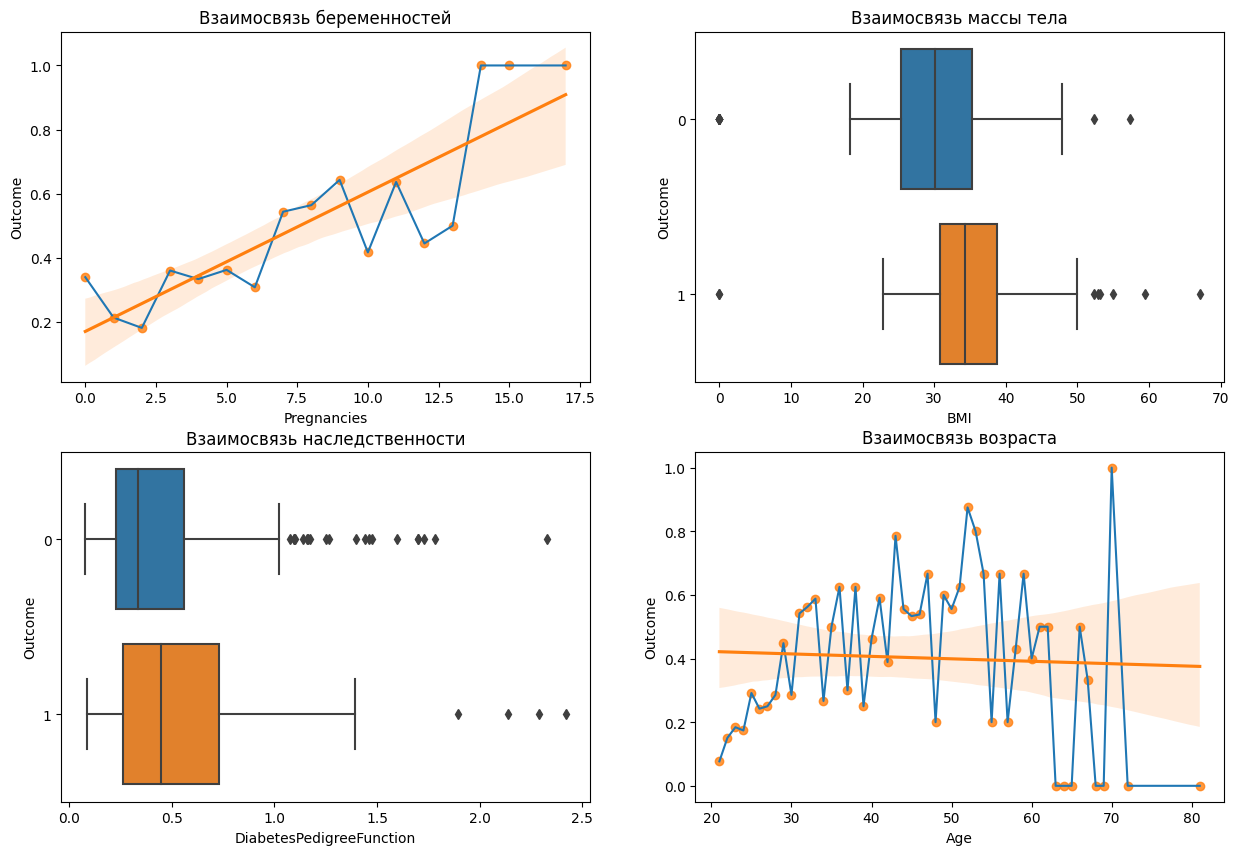

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

hist_data_1 = diabetes.groupby(by='Pregnancies', as_index=False)['Outcome'].mean()
histogram_1 = sns.lineplot(data=hist_data_1, x='Pregnancies', y='Outcome',  ax=axes[0][0])
trend_1 = sns.regplot(data=hist_data_1, x='Pregnancies', y='Outcome',  ax=axes[0][0])
histogram_1.set_title('Взаимосвязь беременностей')

hist_data_2 = diabetes.groupby(by='BMI', as_index=False)['Outcome'].mean()
histogram_2 = sns.boxplot(data=diabetes, x='BMI', y='Outcome',  ax=axes[0][1], orient='h')
histogram_2.set_title('Взаимосвязь массы тела')

hist_data_3 = diabetes.groupby(by='DiabetesPedigreeFunction', as_index=False)['Outcome'].mean()
histogram_3 = sns.boxplot(data=diabetes, x='DiabetesPedigreeFunction', y='Outcome',  ax=axes[1][0], orient='h')
histogram_3.set_title('Взаимосвязь наследственности')

hist_data_4 = diabetes.groupby(by='Age', as_index=False)['Outcome'].mean()
histogram_4 = sns.lineplot(data=hist_data_4, x='Age', y='Outcome',  ax=axes[1][1])
trend_4 = sns.regplot(data=hist_data_4, x='Age', y='Outcome',  ax=axes[1][1])
histogram_4.set_title('Взаимосвязь возраста')

ad = diabetes.groupby('Pregnancies', as_index=False)['Pregnancies'].count()

hist_data_1['Pregnancy_num'] = ad
display(hist_data_1.sort_values(by='Outcome', ascending=False).reset_index(drop=True))

In [85]:
# 8.1

duplicates = diabetes.duplicated()
duplicates
diabetes_dedupped = diabetes.drop_duplicates()
diabetes_dedupped.shape[0]

768

In [29]:
# 8.2

diabetes_uninf = diabetes_dedupped.copy()

drop_list=[]

for col in diabetes_uninf.columns:
    top_freq = diabetes_uninf[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes_uninf[col].nunique() / diabetes_uninf[col].count()
    if top_freq > 0.95: 
        diabetes_uninf = diabetes_uninf.drop(col, axis=1)
        drop_list.append(col)
    if nunique_ratio > 0.95:
        diabetes_uninf = diabetes_uninf.drop(col, axis=1)
        drop_list.append(col)
    
display(diabetes_uninf.shape)
display(drop_list)

(768, 9)

['Gender']

In [84]:
# 8.3

nan_diabetes = diabetes_uninf.copy()
         
# Заменяем нули на NaN
nan_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = nan_diabetes[[
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
    ]].replace(0, np.nan)

round(nan_diabetes['Insulin'].isnull().mean(), 2)

0.49

In [86]:
# 8.4

first_drop = nan_diabetes.copy()

n = first_drop.shape[0]
thresh = n * 0.7
first_drop = first_drop.dropna(thresh=thresh, axis=1)

first_drop.shape[1]

8